# Лабораторная работа № 16, 17 (исследование операционных усилителей)

In [2]:
from utils import GraphPlotter, print_data_from_txt
import numpy as np
import pandas as pd


table_1 = print_data_from_txt("data/1.txt")
display(table_1)
table_2 = print_data_from_txt("data/2.txt")
display(table_2)
table_3 = print_data_from_txt("data/3.txt")
display(table_3)
table_4 = print_data_from_txt("data/4.txt")
display(table_4)
table_5 = print_data_from_txt("data/5.txt")
display(table_5)
table_6 = print_data_from_txt("data/6.txt")
display(table_6)
table_7 = print_data_from_txt("data/7.txt")
display(table_7)


plotter = GraphPlotter()


data_1 = np.loadtxt("data/1.txt", skiprows=1)
data_2 = np.loadtxt("data/2.txt", skiprows=1)
data_3 = np.loadtxt("data/3.txt", skiprows=1)
data_4 = np.loadtxt("data/4.txt", skiprows=1)
data_5 = np.loadtxt("data/5.txt", skiprows=1)
data_6 = np.loadtxt("data/6.txt", skiprows=1)
data_7 = np.loadtxt("data/7.txt", skiprows=1)

,R_4,U_вх
0,1.000000,3.18
1,2.000000,4.78
2,4.700000,9.06
3,10.000000,14.95
4,20.000000,15.05
5,100.000000,15.13
6,200.000000,15.15
7,inf,15.16


,U_вх,U_вых
0,-9.940000,-15.05
1,-6.150000,-15.05
2,-1.150000,-15.05
3,-0.940000,-15.05
4,-0.890000,-15.03
5,-0.780000,-15.03
6,-0.710000,-15.02
7,-0.590000,-12.66
8,-0.550000,-11.63
9,-0.490000,-10.54


,U_вх,U_вых
0,-10.190000,-10.22
1,-5.030000,-5.04
2,-0.050000,-0.05
3,5.220000,5.23
4,10.050000,10.07


,R_4,U_вых
0,1.000000,-1.62
1,2.000000,-3.25
2,4.700000,-7.62
3,10.000000,-14.95
4,20.000000,-15.04
5,100.000000,-15.1
6,200.000000,-15.11
7,inf,-15.12


,R_4,U_вых
0,1.000000,-0.01
1,2.000000,1.1
2,4.700000,2.7
3,10.000000,5.7
4,20.000000,11.3
5,100.000000,14.9
6,200.000000,14.9
7,inf,15.0


,R_4,U_вых
0,1.000000,-0.5
1,2.000000,-1.0
2,4.700000,-2.3
3,10.000000,-4.9
4,20.000000,-9.8
5,100.000000,-15.0
6,200.000000,-15.0
7,inf,-15.0


,R_4,U_вых
0,1.000000,1.36
1,2.000000,2.06
2,4.700000,3.96
3,10.000000,7.7
4,20.000000,12.61
5,100.000000,15.86
6,200.000000,16.25
7,inf,16.48


## Неинвертирующий усилитель

- теоритическое значение: $K_u = \frac {R_2 + R_4} {R_2}$
- экспериментальное значение: $K_u = \frac {U_{вых}} {U_{вх}}$

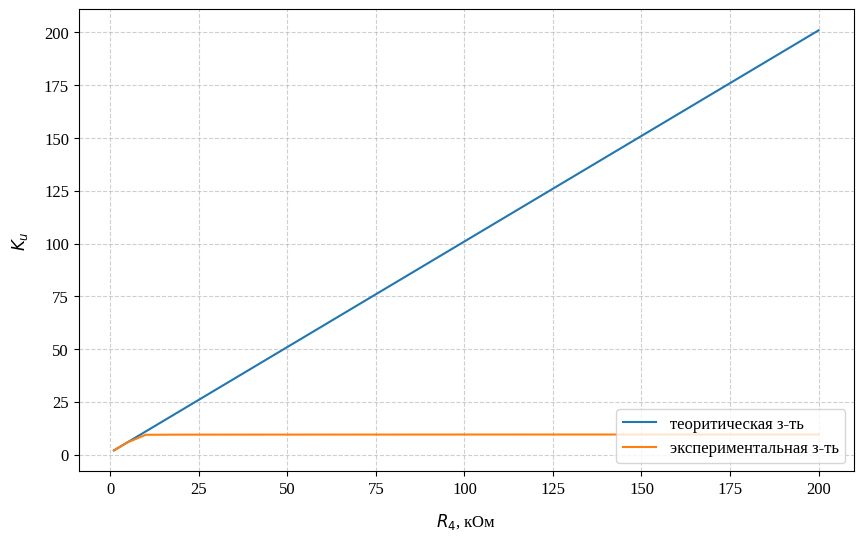

Plot saved: graphs/K_u_1.svg


,"R_4, кОм","U_q, В",K_u_t (теоретический),K_u_e (экспериментальный)
0,1.00,3.180,2.000,2.000
1,2.00,4.780,3.000,3.006
2,4.70,9.060,5.700,5.698
3,10.00,14.950,11.000,9.403
4,20.00,15.050,21.000,9.465
5,100.00,15.130,101.000,9.516
6,200.00,15.150,201.000,9.528
7,inf,15.160,inf,9.535


In [3]:
R_2 = 1 # кОм
U_in = 1.59 # В
R_4, U_q = data_1[:, 0], data_1[:, 1]

K_u_t = (R_2 + R_4) / R_2
K_u_e = U_q / U_in

plotter.create_figure(xlabel="$R_4$, кОм", ylabel="$K_u$")
plotter.add_plot(R_4, K_u_t, label="теоритическая з-ть") # теоритическая кривая
plotter.add_plot(R_4, K_u_e, label="экспериментальная з-ть")  # экспериментальная кривая
plotter.save(
    filename="K_u_1.svg",
    legend_opts={"loc": "lower right"},
)

df = pd.DataFrame(
    {
        "R_4, кОм": R_4,
        "U_q, В": U_q,
        "K_u_t (теоретический)": K_u_t,
        "K_u_e (экспериментальный)": K_u_e,
    }
)

styled_df = (
    df.style.format(
        {
            "R_4, кОм": "{:.2f}",
            "U_q, В": "{:.3f}",
            "K_u_t (теоретический)": "{:.3f}",
            "K_u_e (экспериментальный)": "{:.3f}",
        }
    )
    .set_caption("Сравнение теоретического и экспериментального коэффициентов усиления")
    .set_table_styles(
        [
            {
                "selector": "caption",
                "props": [("font-size", "16px"), ("font-weight", "bold")],
            },
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center")]},
        ]
    )
    .background_gradient(
        cmap="Purples", subset=["K_u_e (экспериментальный)"]
    )
)

styled_df

### Амплитудная х-ка: $U_{вых}=f(U_{вх})$

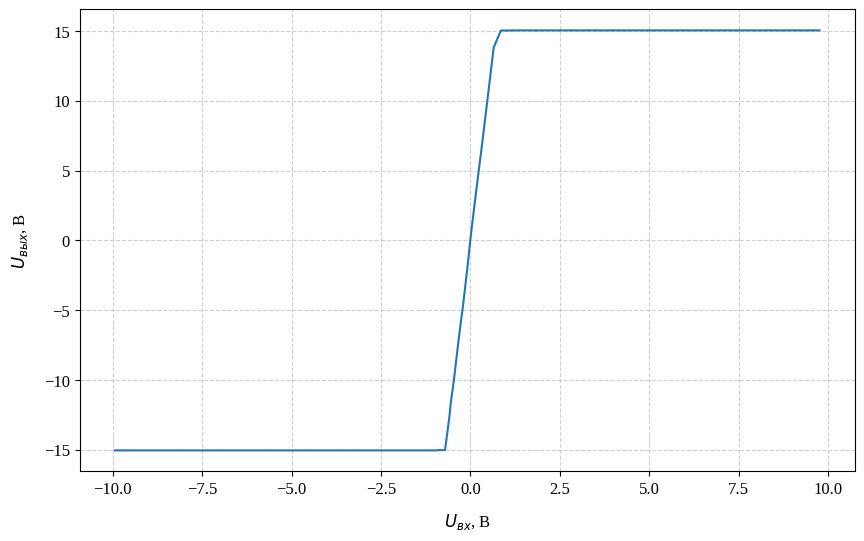

Plot saved: graphs/ampl_1.svg


,"U_in, В","U_q, В",K_u_e (экспериментальный)
0,-9.94,-15.050,1.51
1,-6.15,-15.050,2.45
2,-1.15,-15.050,13.09
3,-0.94,-15.050,16.01
4,-0.89,-15.030,16.89
5,-0.78,-15.030,19.27
6,-0.71,-15.020,21.15
7,-0.59,-12.660,21.46
8,-0.55,-11.630,21.15
9,-0.49,-10.540,21.51


In [11]:
U_in, U_q = data_2[:, 0], data_2[:, 1] # В

plotter.create_figure(xlabel="$U_{вх}$, В", ylabel="$U_{вых}$, В")
plotter.add_plot(U_in, U_q) # Амплитудная х-ка
plotter.save(filename="ampl_1.svg", legend=False)

df = pd.DataFrame(
    {
        "U_in, В": U_in,
        "U_q, В": U_q,
        "K_u_e (экспериментальный)": U_q / U_in,
    }
)

styled_df = (
    df.style.format(
        {
            "U_in, В": "{:.2f}",
            "U_q, В": "{:.3f}",
            "K_u_e (экспериментальный)": "{:.2f}",
        }
    )
    .set_caption("экспериментальный коэффициент усиления повторителя")
    .set_table_styles(
        [
            {
                "selector": "caption",
                "props": [("font-size", "16px"), ("font-weight", "bold")],
            },
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center")]},
        ]
    )
    .background_gradient(cmap="Purples", subset=["K_u_e (экспериментальный)"])
)

styled_df

## Исследование повторителя ($K_u$, $U_{вых} = f(U_{вх})$)

In [5]:
R_4 = 20 # кОм
U_in, U_q = data_3[:, 0], data_3[:, 1] # В

df = pd.DataFrame(
    {
        "U_in, В": U_in,
        "U_q, В": U_q,
        "K_u_e (экспериментальный)": U_q / U_in,
    }
)

styled_df = (
    df.style.format(
        {
            "U_in, В": "{:.2f}",
            "U_q, В": "{:.3f}",
            "K_u_e (экспериментальный)": "{:.3f}",
        }
    )
    .set_caption("экспериментальный коэффициент усиления повторителя")
    .set_table_styles(
        [
            {
                "selector": "caption",
                "props": [("font-size", "16px"), ("font-weight", "bold")],
            },
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center")]},
        ]
    )
    .background_gradient(cmap="Purples", subset=["K_u_e (экспериментальный)"])
)

styled_df

,"U_in, В","U_q, В",K_u_e (экспериментальный)
0,-10.19,-10.220,1.003
1,-5.03,-5.040,1.002
2,-0.05,-0.050,1.000
3,5.22,5.230,1.002
4,10.05,10.070,1.002


## Инвертирующий усилитель (анологично неинвертирующему у-лю)

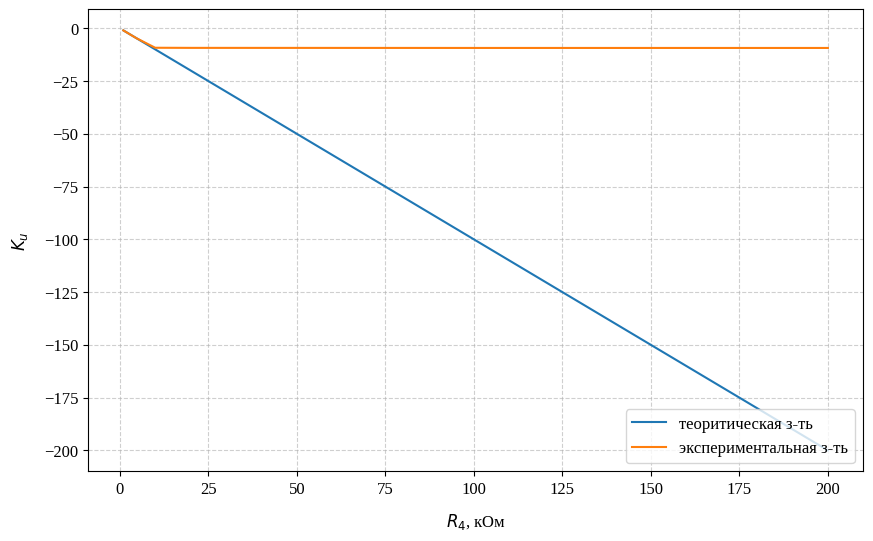

Plot saved: graphs/K_u_4.svg


,"R_4, кОм","U_q, В",K_u_t (теоретический),K_u_e (экспериментальный)
0,1.00,-1.620,-1.000,-1.000
1,2.00,-3.250,-2.000,-2.006
2,4.70,-7.620,-4.700,-4.704
3,10.00,-14.950,-10.000,-9.228
4,20.00,-15.040,-20.000,-9.284
5,100.00,-15.100,-100.000,-9.321
6,200.00,-15.110,-200.000,-9.327
7,inf,-15.120,-inf,-9.333


In [6]:
R_2 = 1 # кОм
U_in = 1.62 # В
R_4, U_q = data_4[:, 0], data_4[:, 1]

K_u_t = - (R_4) / R_2
K_u_e = U_q / U_in

plotter.create_figure(xlabel="$R_4$, кОм", ylabel="$K_u$")
plotter.add_plot(R_4, K_u_t, label="теоритическая з-ть") # теоритическая кривая
plotter.add_plot(R_4, K_u_e, label="экспериментальная з-ть")  # экспериментальная кривая
plotter.save(
    filename="K_u_4.svg",
    legend_opts={"loc": "lower right"},
)

df = pd.DataFrame(
    {
        "R_4, кОм": R_4,
        "U_q, В": U_q,
        "K_u_t (теоретический)": K_u_t,
        "K_u_e (экспериментальный)": K_u_e,
    }
)

styled_df = (
    df.style.format(
        {
            "R_4, кОм": "{:.2f}",
            "U_q, В": "{:.3f}",
            "K_u_t (теоретический)": "{:.3f}",
            "K_u_e (экспериментальный)": "{:.3f}",
        }
    )
    .set_caption("Сравнение теоретического и экспериментального коэффициентов усиления")
    .set_table_styles(
        [
            {
                "selector": "caption",
                "props": [("font-size", "16px"), ("font-weight", "bold")],
            },
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center")]},
        ]
    )
    .background_gradient(
        cmap="Purples", subset=["K_u_e (экспериментальный)"]
    )
)

styled_df

## Дифференциальный у-ль ("+")

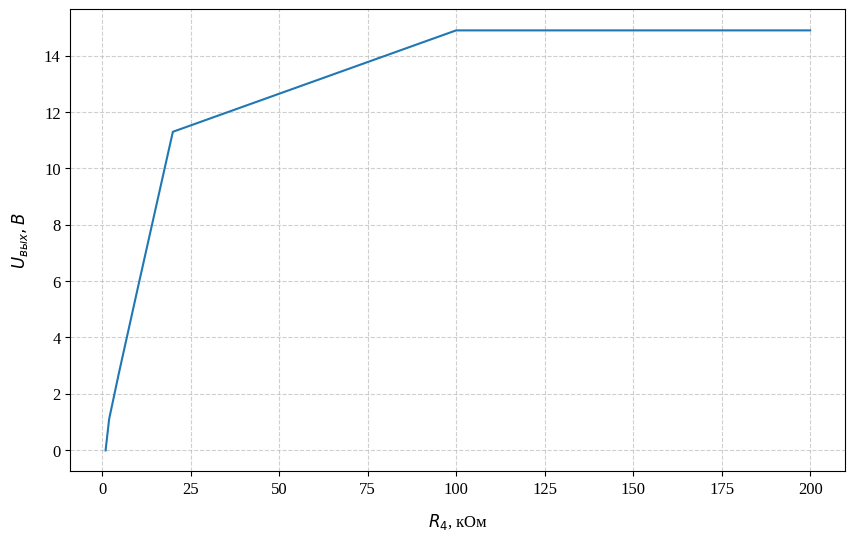

Plot saved: graphs/dif+.svg


In [7]:
U1_in = 1.57 # В
U2_in = 2.15 # В
R_4 = data_5[:, 0] # кОм
U_q = data_5[:, 1] # В

plotter.create_figure(xlabel="$R_4$, кОм", ylabel="$U_{вых}, В$")
plotter.add_plot(R_4, U_q)
plotter.save(filename="dif+.svg", legend=False)

## Дифференциальный у-ль ("-")

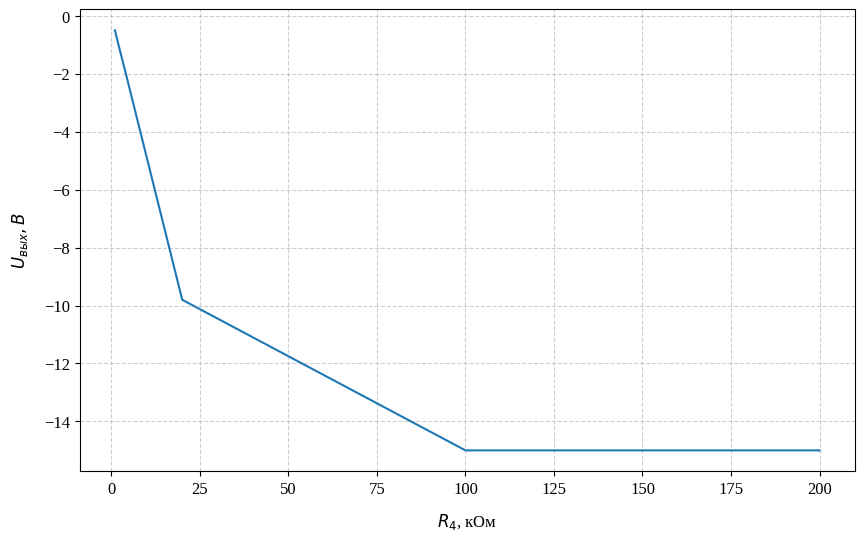

Plot saved: graphs/dif-.svg


In [8]:
U1_in = 1.57  # В
U2_in = 2.15  # В
R_4 = data_6[:, 0]  # кОм
U_q = data_6[:, 1]  # В

plotter.create_figure(xlabel="$R_4$, кОм", ylabel="$U_{вых}, В$")
plotter.add_plot(R_4, U_q)
plotter.save(filename="dif-.svg", legend=False)

## Неинвертирующий у-ль на переменном токе

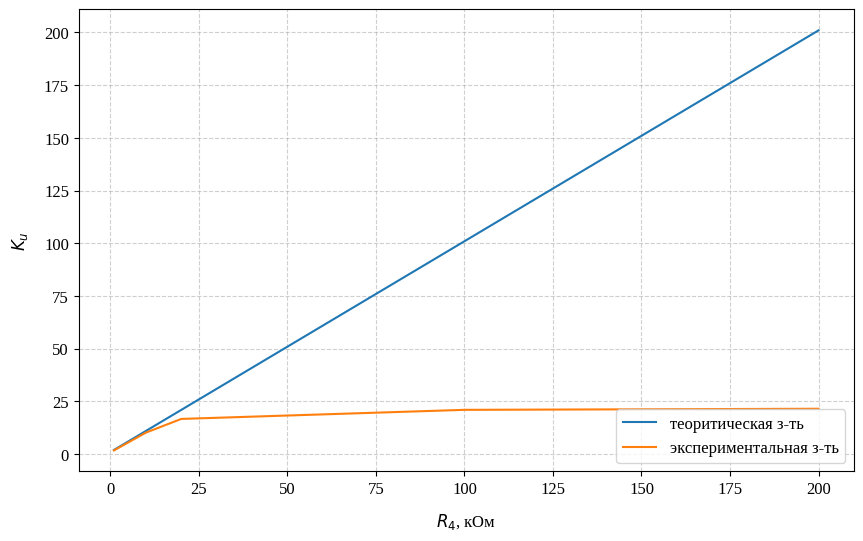

Plot saved: graphs/K_u_7.svg


,"R_4, кОм","U_q, В",K_u_t (теоретический),K_u_e (экспериментальный)
0,1.00,1.360,2.000,1.804
1,2.00,2.060,3.000,2.732
2,4.70,3.960,5.700,5.252
3,10.00,7.700,11.000,10.212
4,20.00,12.610,21.000,16.724
5,100.00,15.860,101.000,21.034
6,200.00,16.250,201.000,21.552
7,inf,16.480,inf,21.857


In [9]:
R_2 = 1 # кОм
U_in = 0.754 # В
R_4, U_q = data_7[:, 0], data_7[:, 1]
K_u_t = (R_2 + R_4) / R_2
K_u_e = U_q / U_in

plotter.create_figure(xlabel="$R_4$, кОм", ylabel="$K_u$")
plotter.add_plot(R_4, K_u_t, label="теоритическая з-ть") # теоритическая кривая
plotter.add_plot(R_4, K_u_e, label="экспериментальная з-ть")  # экспериментальная кривая
plotter.save(
    filename="K_u_7.svg",
    legend_opts={"loc": "lower right"},
)

df = pd.DataFrame(
    {
        "R_4, кОм": R_4,
        "U_q, В": U_q,
        "K_u_t (теоретический)": K_u_t,
        "K_u_e (экспериментальный)": K_u_e,
    }
)

styled_df = (
    df.style.format(
        {
            "R_4, кОм": "{:.2f}",
            "U_q, В": "{:.3f}",
            "K_u_t (теоретический)": "{:.3f}",
            "K_u_e (экспериментальный)": "{:.3f}",
        }
    )
    .set_caption("Сравнение теоретического и экспериментального коэффициентов усиления")
    .set_table_styles(
        [
            {
                "selector": "caption",
                "props": [("font-size", "16px"), ("font-weight", "bold")],
            },
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center")]},
        ]
    )
    .background_gradient(
        cmap="Purples", subset=["K_u_e (экспериментальный)"]
    )
)

styled_df